Iremos testar um dos arquivos considerando todas as quebras de linha

In [55]:
texto = []
fhandle = open('./dados/0.80S-49.02W-TAVG-Trend.txt')
for linha in fhandle:
    if linha.startswith('%'):
       texto.append(linha[1:])
print(texto)


[' This file contains an extracted local summary of land-surface \n', ' temperature results produced by the Berkeley Earth averaging \n', ' method for the location: \n', ' \n', '    0.80 S, 49.02 W\n', ' \n', ' The Berkeley Earth method takes temperature observations from a large \n', ' collection of weather monitoring stations and produces an estimate of \n', " the underlying global temperature field across all of the Earth's \n", ' land areas.  Once this temperature field has been generated, it is \n', ' possible to estimate the temperature evolution of individual locations \n', ' simply by sampling the field at the locaiton in question.  This \n', ' file contains such a local estimate.\n', ' \n', ' Temperatures are in Celsius and reported as anomalies relative to the \n', ' Jan 1951-Dec 1980 average.  Uncertainties represent the 95% confidence \n', ' interval for statistical noise and spatial undersampling effects.  Such \n', ' uncertainties are expected to account for the effects o

Iremos testar formas de extrair somente a latitude, a longitude e a cidade mais próxima da estação do texto

In [56]:
latitude_longitude = texto[4].split()

In [57]:
latitude_longitude

['0.80', 'S,', '49.02', 'W']

In [58]:
latitude = latitude_longitude[0] + latitude_longitude[1]
print(latitude) 

0.80S,


In [59]:
longitude = latitude_longitude[2] + latitude_longitude[3]
print(longitude)

49.02W


In [60]:
nearby_cities = texto[35].split()
print(nearby_cities)

['Nearby', 'Cities:', 'BelÃ©m,', 'Ananindeua,', 'Barcarena,', 'Vigia,', 'Soure']


In [61]:
cidade_proxima = nearby_cities[2]
print(cidade_proxima)

BelÃ©m,


Iremos montar a função que tenha como entrada o nome de arquivo de dado e retorne a latitude, a longitude e a cidade mais próxima da estação e testaremos novamente

In [62]:
import numpy as np
def nome(arquivo):
    assert type(arquivo) == np.ndarray, 'arquivo deve ser um nupy array'
    latitude = latitude_longitude[0] + latitude_longitude[1]
    longitude = latitude_longitude[2] + latitude_longitude[3]
    cidade_proxima = nearby_cities[2].sprint()
    return (latitude,longitude,cidade_proxima)
    

In [63]:
latitude

'0.80S,'

In [64]:
longitude

'49.02W'

In [65]:
cidade_proxima

'BelÃ©m,'

Criaremos uma função que tenha como entrada o nome de um arquivo e retorne a estimativa da temperatura anual, que será a soma da temperatura absoluta estimada com a anomalia anual

In [66]:
est_temp_abs = []
contador = []
count = -1
for indice_lista in texto:
    count = count + 1
    if 'absolute temperature' in indice_lista:
        est_temp_abs.append(indice_lista)
        contador.append(count)

In [67]:
print(est_temp_abs)
print(contador)
contador

[' Estimated Jan 1951-Dec 1980 absolute temperature (C): 26.74 +/- 0.81\n', ' Estimated Jan 1951-Dec 1980 monthly absolute temperature (C):\n']
[47, 49]


[47, 49]

In [68]:
frase = est_temp_abs[0].split()

In [69]:
frase

['Estimated',
 'Jan',
 '1951-Dec',
 '1980',
 'absolute',
 'temperature',
 '(C):',
 '26.74',
 '+/-',
 '0.81']

In [70]:
frase[7]

'26.74'

In [71]:
estimativa_anual = frase[7]

In [72]:
dados = np.loadtxt('dados/0.80S-49.02W-TAVG-Trend.txt', comments = '%')

In [73]:
def est_anual(dados):
    coluna_anomalia =np.nan_to_num(dados[:,4])
    frase = est_temp_abs[0].split()
    converter = float (frase[7]) 
    final = converter + coluna_anomalia
    return (final)

In [74]:
est_anual(dados)

array([ 26.74 ,  26.74 ,  25.868, ...,  26.74 ,  26.74 ,  26.74 ])

Iremos criar uma função para plotar os gráficos de Temperatura anual estimada e  ano decimal

In [75]:
Title = ('Lat ',latitude) + ('Long',longitude)

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
arquivos = glob.glob('dados/*.txt')

In [81]:
def plotar_graficos(arquivo):
    dados= np.loadtxt(arquivo, comments='%')
    anos = dados[:, 0]
    meses = dados[:, 1]
    coluna_anomalia =np.nan_to_num(dados[:,4])
    frase = est_temp_abs[0].split()
    converter = float (frase[7])
    final = converter + coluna_anomalia
    ano_decimal = (meses - 1)/12 + anos
    plt.figure()
    plt.plot(ano_decimal, final, 'k-')
    plt.title(Title)
    plt.xlabel('Ano')
    plt.ylabel('Temperatura Anual Estimada(°C)')

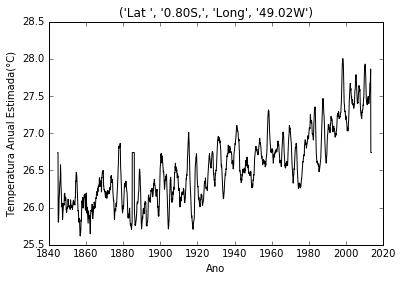

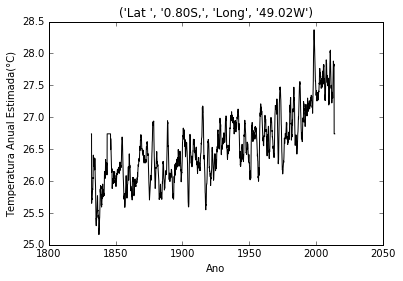

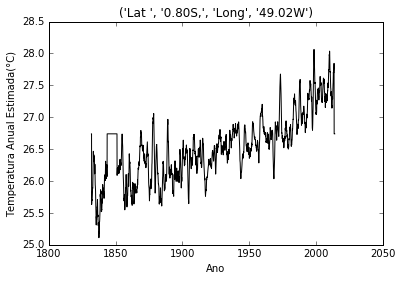

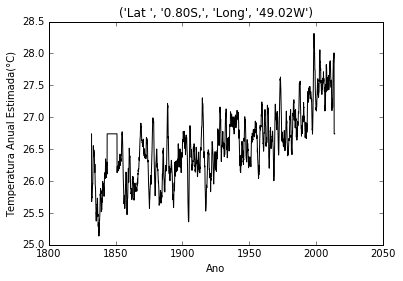

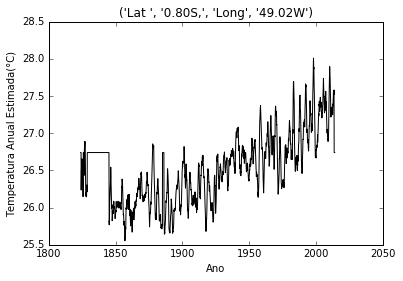

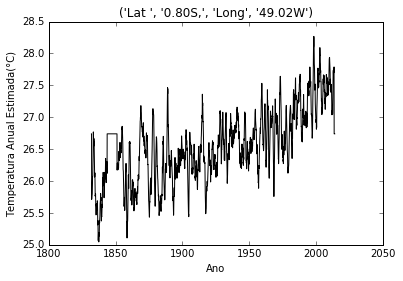

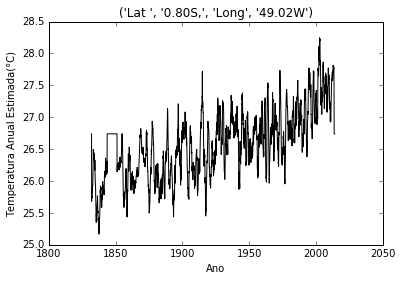

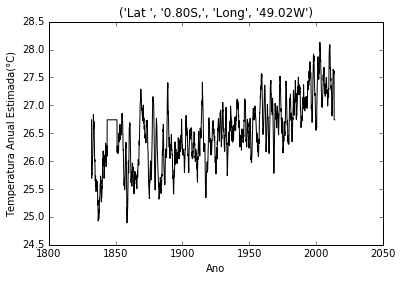

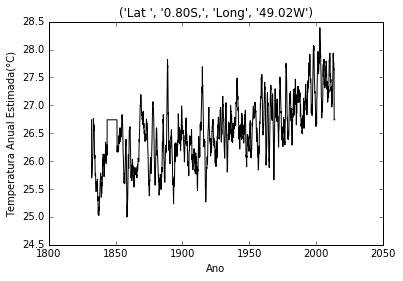

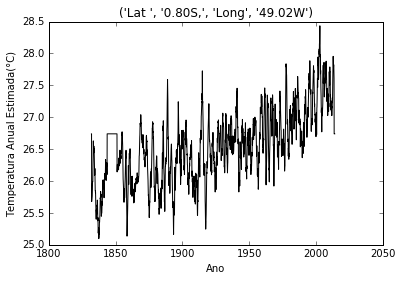

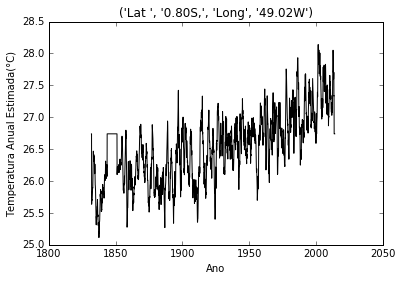

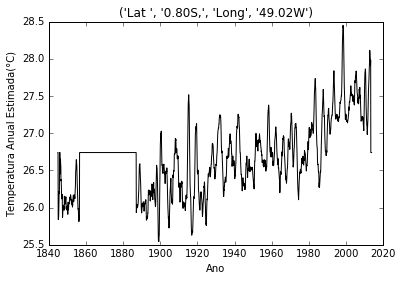

In [82]:
 for arquivo in arquivos[0:12]:
    plotar_graficos(arquivo)